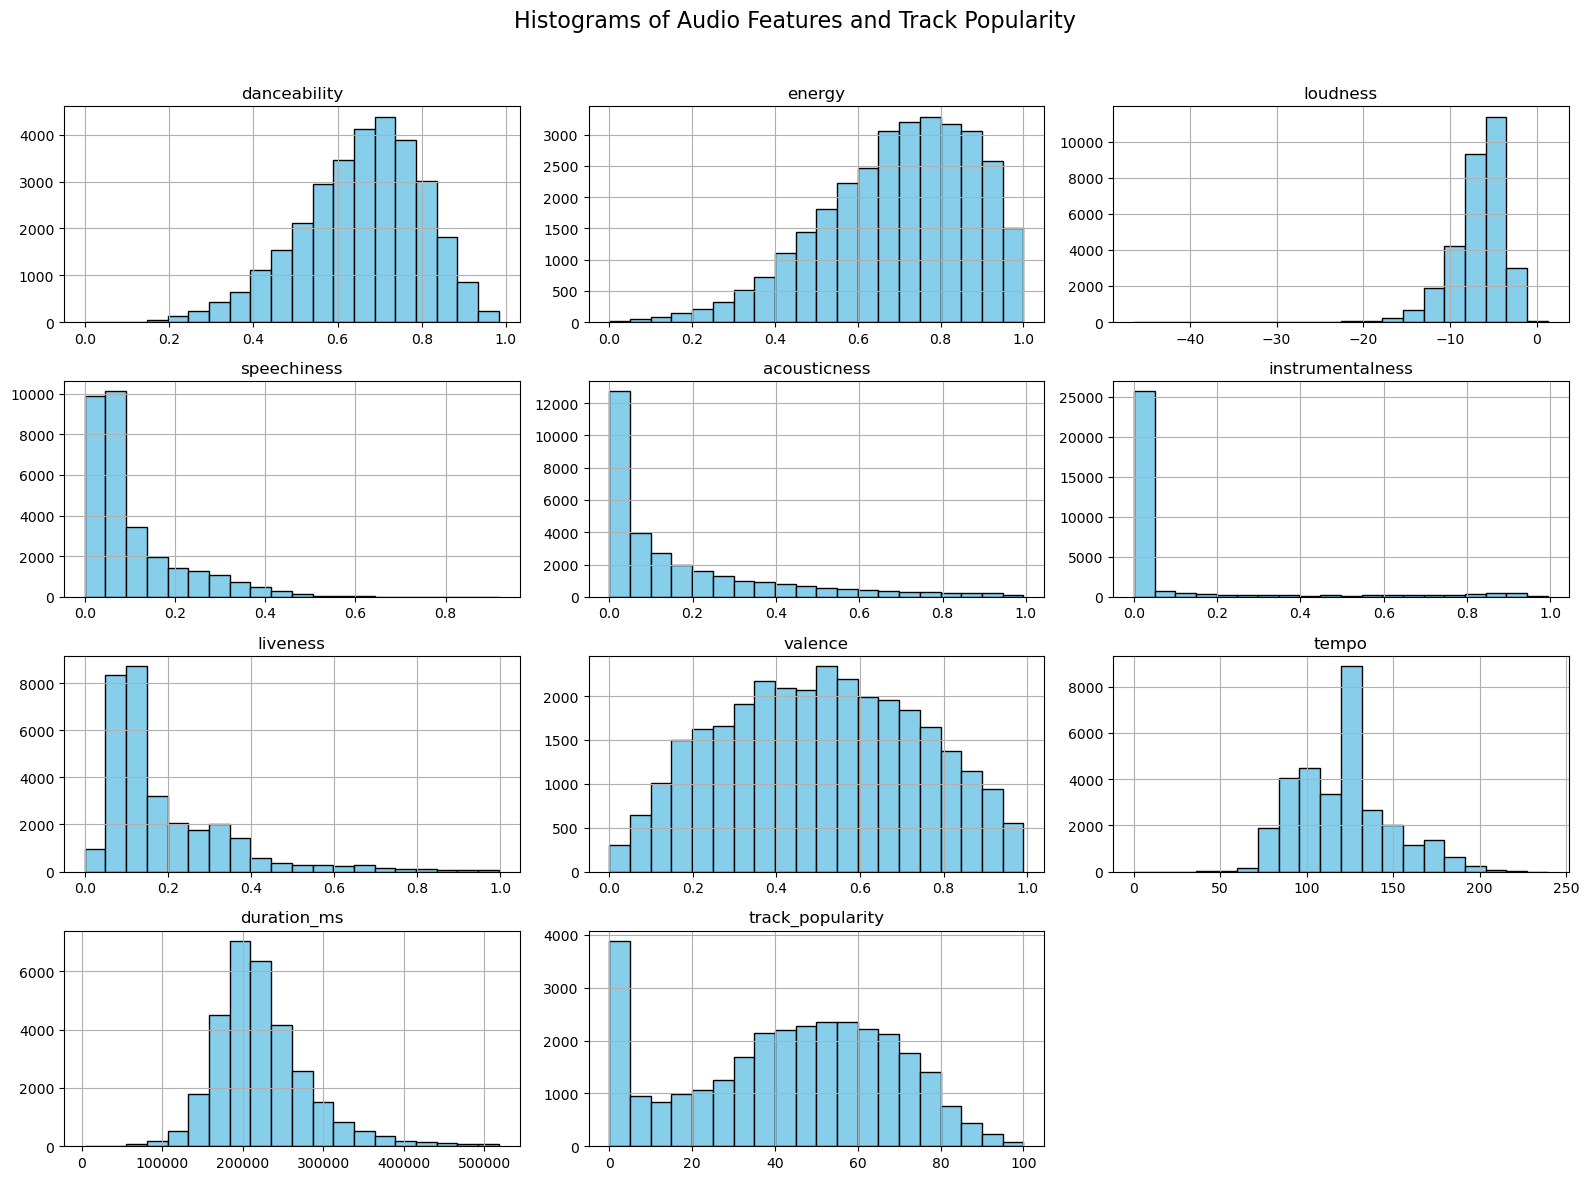

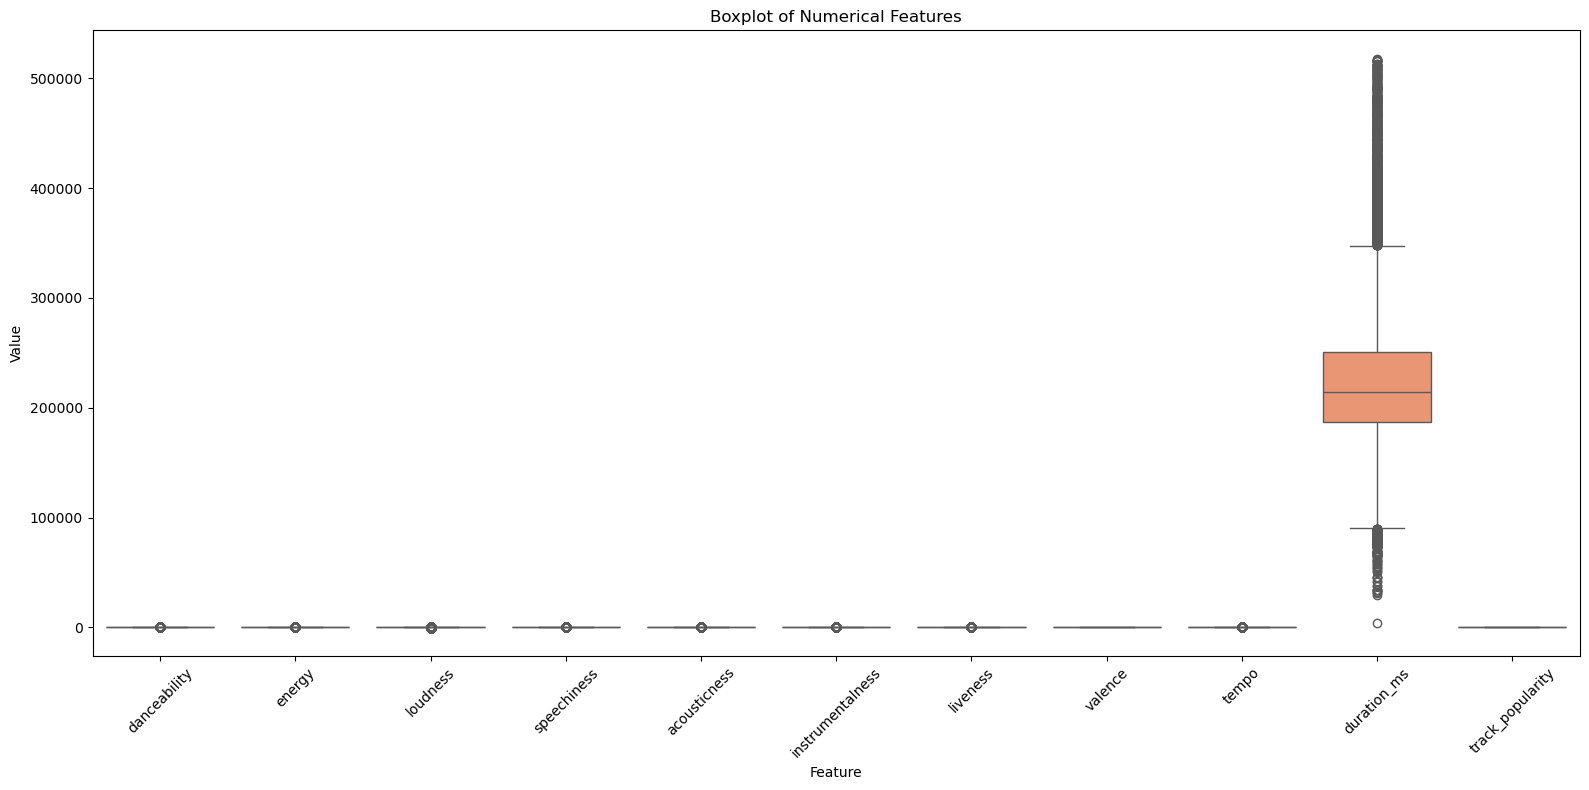

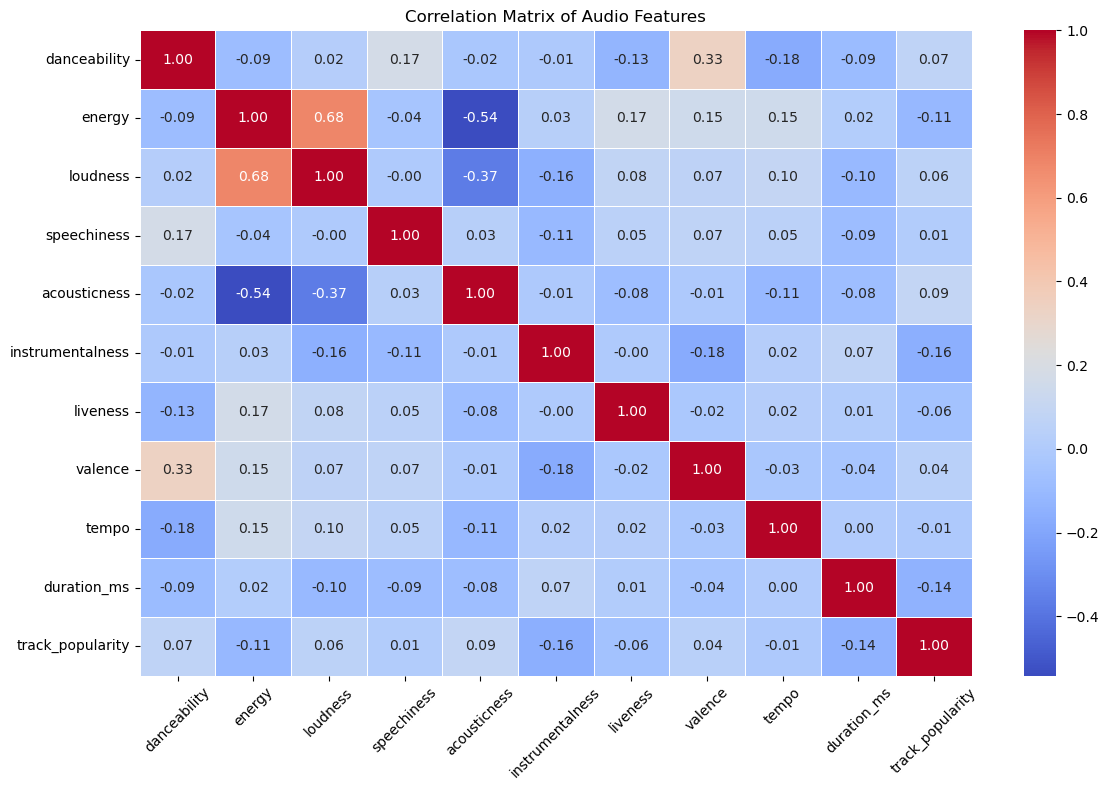

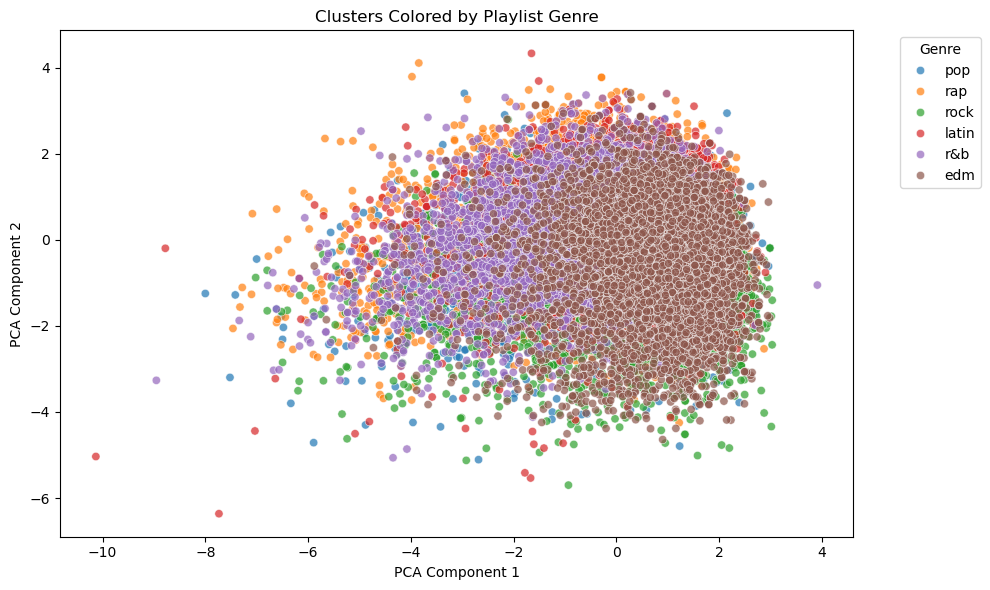

RandomForestClassifier(random_state=42)

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load dataset
df = pd.read_csv(r"C:\Users\USER\Downloads\spotify dataset.csv")

# Clean dataset
df_cleaned = df.dropna(subset=['track_name', 'track_artist', 'track_album_name']).copy()
df_cleaned.loc[:, 'track_album_release_date'] = pd.to_datetime(
    df_cleaned['track_album_release_date'],
    format='%m-%d-%y',
    errors='coerce'
)
df_cleaned = df_cleaned.dropna(subset=['track_album_release_date'])
df_cleaned.reset_index(drop=True, inplace=True)

# Numerical features for analysis
numerical_features = [
    'danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
    'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'track_popularity']

# VISUALIZATION
# Histograms
df_cleaned[numerical_features].hist(bins=20, figsize=(16, 12), layout=(4, 3), color='skyblue', edgecolor='black')
plt.suptitle('Histograms of Audio Features and Track Popularity', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Boxplots
plt.figure(figsize=(16, 8))
sns.boxplot(data=df_cleaned[numerical_features], palette='Set2')
plt.xticks(rotation=45)
plt.title('Boxplot of Numerical Features')
plt.xlabel('Feature')
plt.ylabel('Value')
plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_cleaned[numerical_features].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Audio Features')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# CLUSTERING
# Filter for rows with genre info
df_cluster = df_cleaned.dropna(subset=['playlist_genre', 'playlist_subgenre']).copy()

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster[numerical_features])

# Reduce dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
df_cluster['cluster'] = kmeans.fit_predict(X_scaled)

# Visualize clusters vs playlist genre
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df_cluster['playlist_genre'], palette='tab10', alpha=0.7)
plt.title('Clusters Colored by Playlist Genre')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# MODEL TRAINING
# Encode target genre
le = LabelEncoder()
df_cluster['genre_encoded'] = le.fit_transform(df_cluster['playlist_genre'])

# Split data
X = df_cluster[numerical_features]
y = df_cluster['genre_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale again for model
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)


In [ ]:
# Spotify dataset key insights:
#Audio Feature Distributions:
1.Danceability shows a right-skewed distribution with most tracks clustering around 0.6-0.8, indicating that the majority of popular music has moderate to high danceability. This suggests dance-friendly tracks dominate streaming platforms.
Energy displays a relatively normal distribution centered around 0.6-0.7, showing that most tracks maintain a balanced energy level rather than being extremely low or high energy.
2.Loudness is heavily concentrated around -5 to -15 dB, with very few quiet tracks below -30 dB. This reflects the "loudness war" in modern music production where tracks are mastered to be consistently loud.
Speechiness is heavily left-skewed with most tracks below 0.2, confirming that purely instrumental or singing-focused tracks dominate over rap/spoken word content.
3.Acousticness shows a bimodal distribution with peaks at both low (0.0-0.2) and moderate (0.4-0.6) levels, suggesting clear separation between electronic/produced music and acoustic performances.
4.Instrumentalness is extremely left-skewed with most tracks near 0.0, indicating that vocal tracks vastly outnumber purely instrumental pieces on Spotify.

#Temporal and Structural Patterns:
1.Liveness is heavily concentrated near 0.0, showing that studio recordings far outnumber live performances in the dataset.
2.Valence (musical positivity) shows a relatively uniform distribution across the spectrum, suggesting diverse emotional content in popular music.
3.Tempo clusters around 100-140 BPM with a notable peak around 120 BPM, aligning with dance music and pop music standards.
4.Duration shows most tracks falling between 150,000-250,000 ms (2.5-4 minutes), following traditional radio-friendly song lengths.

#Other key insights from spotify data set:
1.Production Standards: The concentration of loudness values suggests industry-standard mastering practices, with tracks optimized for consistent playback across devices.
2.Genre Preferences: The low speechiness and instrumentalness values indicate that vocal-driven pop, rock, and electronic music dominate the platform over rap or classical instrumental music.
3.Danceability Premium: The right-skewed danceability distribution suggests that tracks with groove and rhythm perform better on streaming platforms.
4.Format Consistency: The duration clustering around 3-4 minutes shows that despite digital freedom, artists still adhere to traditional song structures for maximum appeal.
5.Emotional Diversity: The uniform valence distribution indicates that both happy and melancholic music find audiences, suggesting playlist diversity in emotional content.